<img src="../img/ods_stickers.jpg" />

## 线性回归和线性分类器

---

#### 介绍

本次实验简述了最小二乘法、最大似然估计、逻辑回归、正则化、验证和学习曲线的基本概念，搭建了基于逻辑回归的线性模型并进行正则化，通过分析 IBMD 数据集的二元分类问题和一个 XOR 问题阐述逻辑回归的优缺点。

#### 知识点

- 回归
- 线性分类
- 逻辑回归的正则化
- 逻辑回归的优缺点
- 验证和学习曲线

---

### 最小二乘法

在开始学习线性模型之前，简要介绍一下线性回归，首先指定一个模型将因变量 $y$ 和特征联系起来，对线性模型而言，依赖函数的形式如下：

$$y = w_0 + \sum_{i=1}^m w_i x_i$$ 

如果为每项观测加上一个虚维度 $x_0 = 1$（比如偏置），那么就可以把 $w_0$ 整合进求和项中，改写为一个略微紧凑的形式：

$$y = \sum_{i=0}^m w_i x_i = \textbf{w}^\text{T} \textbf{x}$$

如果有一个特征观测矩阵，其中矩阵的行是数据集中的观测，那么需要在左边加上一列。由此，线性模型可以定义为：

$$ \textbf y = \textbf X \textbf w + \epsilon$$

其中：

- $\textbf y \in \mathbb{R}^n$：因变量（目标变量）。
- $w$：模型的参数向量（在机器学习中，这些参数经常被称为权重）。
- $\textbf X$：观测及其特征矩阵，大小为 n 行、m+1 列（包括左侧的虚列），其秩的大小为 $\text{rank}\left(\textbf X\right) = m + 1 $。
- $\epsilon $：一个变量，用来表示随机、不可预测模型的错误。

上述表达式亦可这样写：

$$ y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

模型具有如下限制（否则它就不是线性回归了）：

- 随机误差的期望为零：$\forall i: \mathbb{E}\left[\epsilon_i\right] = 0 $;
- 随机误差具有相同的有限方差，这一性质称为等分散性：$\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty $;
- 随机误差不相关：$\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0 $.

权重 $w_i$ 的估计 $\widehat{w}_i$  满足如下条件时，称其为线性：

$$ \widehat{w}_i = \omega_{1i}y_1 + \omega_{2i}y_2 + \cdots + \omega_{ni}y_n$$

其中对于 $\forall\ k\ $，$\omega_{ki}$ 仅依赖于 $X$ 中的样本。由于寻求最佳权重的解是一个线性估计，这一模型被称为线性回归。

再引入一项定义：当期望值等于估计参数的真实值时，权重估计被称为无偏（unbiased）：

$$ \mathbb{E}\left[\widehat{w}_i\right] = w_i$$

计算这些权重的方法之一是普通最小二乘法（OLS）。OLS 可以最小化因变量实际值和模型给出的预测值之间的均方误差：

$$ \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}$$

为了解决这一优化问题，需要计算模型参数的导数。将导数设为零，然后求解关于 $\textbf w$ 的等式，倘若不熟悉矩阵求导，可以参考下面的 4 个式子：

$$\begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \end{array}$$

$$\begin{array}{rcl} \frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \end{array}$$

$$\begin{array}{rcl}\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y} \end{array}$$

$$\begin{array}{rcl} \frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$

现在开始计算模型参数的导数：

$$ \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$ \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

基于上述的定义和条件，可以说，根据高斯-马尔可夫定理，模型参数的 OLS 估计是所有线性无偏估计中最优的，即通过 OLS 估计可以获得最低的方差。

有人可能会问，为何选择最小化均方误差而不是其他指标？因为若不选择最小化均方误差，那么就不满足高斯-马尔可夫定理的条件，得到的估计将不再是最佳的线性无偏估计。

最大似然估计是解决线性回归问题一种常用方法，下面介绍它的概念。

### 最大似然估计

首先举一个简单的例子，我们想做一个试验判定人们是否记得简单的甲醇化学式 $CH_3OH$。首先调查了 400 人，发现只有 117 个人记得甲醇的化学式。那么，直接将 $\frac{117}{400} \approx 29\%$ 作为估计下一个受访者知道甲醇化学式的概率是较为合理的。这个直观的估计就是一个最大似然估计。为什么会这么估计呢？回忆下伯努利分布的定义：如果一个随机变量只有两个值（1 和 0，相应的概率为 $\theta$ 和 $1 - \theta$），那么该随机变量满足伯努利分布，遵循以下概率分布函数：

$$ p\left(\theta, x\right) = \theta^x \left(1 - \theta\right)^\left(1 - x\right), x \in \left\{0, 1\right\}$$

这一分布正是我们所需要的，分布参数 $\theta$ 就是「某个人知道甲醇化学式」的概率估计。在 400 个独立试验中，试验的结果记为 $\textbf{x} = \left(x_1, x_2, \ldots, x_{400}\right)$。写下数据的似然，即观测的可能性，比如正好观测到 117 个随机变量 $x = 1$ 和 283 个随机变量 $x = 0$ 的可能性：

 $$ p(\textbf{x}; \theta) = \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = \theta^{117} \left(1 - \theta\right)^{283}$$

接着，将最大化这一 $\theta$ 的表达式。一般而言，为了简化计算，并不最大化似然 $p(\textbf{x}; \theta)$，转而最大化其对数（这种变换不影响最终答案）：

$$ \log p(\textbf{x}; \theta) = \log \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = $$

$$  = \log \theta^{117} \left(1 - \theta\right)^{283} =  117 \log \theta + 283 \log \left(1 - \theta\right)$$

为了找到最大化上式的 $\theta$ 值，将上式对 $\theta$ 求导，并令其为零，求解所得等式：

$$  \frac{\partial \log p(\textbf{x}; \theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \left(117 \log \theta + 283 \log \left(1 - \theta\right)\right) = \frac{117}{\theta} - \frac{283}{1 - \theta};$$

由上可知，我们的直观估计正好是最大似然估计。现在将这一推理过程应用到线性回归问题上，尝试找出均方误差背后的道理。为此，需要从概率论的角度来看线性回归。我们的模型和之前是一样的：

$$ \textbf y = \textbf X \textbf w + \epsilon$$

不过，现在假定随机误差符合均值为零的 [<i class="fa fa-external-link-square" aria-hidden="true"> 正态分布</i>](https://baike.baidu.com/item/正态分布/829892?fr=aladdin)：

$$ \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

据此改写模型：

$$ \begin{array}{rcl} 
y_i &=& \sum_{j=1}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=1}^m w_j X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left(y_i \mid \textbf X; \textbf{w}\right) &=& \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

由于样本是独立抽取的（误差不相关是高斯-马尔可夫定理的条件之一），数据的似然看起来会是密度函数 $p\left(y_i\right)$ 的积。转化为对数形式：

$$ \begin{array}{rcl} 
\log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2
\end{array}$$

想要找到最大似然假设，即需要最大化表达式 $p\left(\textbf{y} \mid \textbf X; \textbf{w}\right)$ 以得到 $\textbf{w}_{\text{ML}}$，这和最大化其对数是一回事。注意，当针对某个参数最大化函数时，可以丢弃所有不依赖这一参数的变量：

$$ \begin{array}{rcl} 
\textbf{w}_{\text{ML}} &=& \arg \max_{\textbf w} p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) = \arg \max_{\textbf w} \log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=&  \arg \min_{\textbf w} \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right)
\end{array}$$

所以，当测量误差服从正态（高斯）分布的情况下， 最小二乘法等价于极大似然估计。

### 偏置-方差分解

下面讨论线性回归预测的误差性质（可以推广到机器学习算法上），上文提到：

- 目标变量的真值 $y$ 是确定性函数 $f\left(\textbf{x}\right)$ 和随机误差 $\epsilon$ 之和：$y = f\left(\textbf{x}\right) + \epsilon$。
- 误差符合均值为零、方差一致的正态分布：$\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$。
- 目标变量的真值亦为正态分布：$y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$。
- 试图使用一个协变量线性函数逼近一个未知的确定性函数 $f\left(\textbf{x}\right)$，这一协变量线性函数是函数空间中估计函数 $f$ 的一点，即均值和方差的随机变量。

因此，点 $\textbf{x}$ 的误差可分解为：

$$ \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

为了简洁，省略函数的参数，分别考虑每个变量。根据公式 $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$ 可以分解前两项为：

$$ \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$

注意：

$$ \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}$$

$$ \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$

接着处理和的最后一项。由于误差和目标变量相互独立，所以可以将它们分离，写为：

$$ \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

最后，将上述公式合并为：

$$ \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

由此，从上等式可知，任何线性模型的预测误差由三部分组成：

- 偏差（bias）: $\text{Bias}\left(\widehat{f}\right)$ 度量了学习算法的期望输出与真实结果的偏离程度, 刻画了算法的拟合能力，偏差偏高表示预测函数与真实结果差异很大。
- 方差（variance）: $\text{Var}\left(\widehat{f}\right)$ 代表「同样大小的不同的训练数据集训练出的模型」与「这些模型的期望输出值」之间的差异。训练集变化导致性能变化，方差偏高表示模型很不稳定。
- 不可消除的误差（irremovable error）: $\sigma^2$ 刻画了当前任务任何算法所能达到的期望泛化误差的下界，即刻画了问题本身的难度。

尽管无法消除 $\sigma^2$，但我们可以影响前两项。理想情况下，希望同时消除偏差和方差（见下图中左上），但是在实践中，常常需要在偏置和不稳定（高方差）间寻找平衡。

<img src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025218835" width="400">

一般而言，当模型的计算量增加时（例如，自由参数的数量增加了），估计的方差（分散程度）也会增加，但偏置会下降，这可能会导致过拟合现象。另一方面，如果模型的计算量太少（例如，自由参数过低)，这可能会导致欠拟合现象。

<img src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025236837" width="480">

高斯-马尔可夫定理表明：在线性模型参数估计问题中，OLS 估计是最佳的线性无偏估计。这意味着，如果存在任何无偏线性模型 g，可以确信 $Var\left(\widehat{f}\right) \leq Var\left(g\right)$。

### 线性回归的正则化

低偏置和低方差往往是不可兼得的，所以在一些情形下，会为了稳定性（降低模型的方差）而导致模型的偏置 $\text{Var}\left(\widehat{f}\right)$ 提高。高斯-马尔可夫定理成立的条件之一就是矩阵 $\textbf{X}$ 是满秩的，否则 OLS 的解 $\textbf{w} = \left(\textbf{X}^\text{T} \textbf{X}\right)^{-1} \textbf{X}^\text{T} \textbf{y}$ 就不存在，因为逆矩阵 $\left(\textbf{X}^\text{T} \textbf{X}\right)^{-1}$ 不存在，此时矩阵 $\textbf{X}^\text{T} \textbf{X}$ 被称为奇异矩阵或退化矩阵。这类问题被称为病态问题，必须加以矫正，也就是说，矩阵 $\textbf{X}^\text{T} \textbf{X}$ 需要变成非奇异矩阵（这正是这一过程叫做正则化的原因）。

我们常常能在这类数据中观察到所谓的多重共线性：两个或更多特征高度相关，也就是矩阵 $\textbf{X}$ 的列之间存在类似线性依赖的关系（又不完全是线性依赖）。例如，在「基于特征预测房价」这一问题中，属性「含阳台的面积」和「不含阳台的面积」会有一个接近线性依赖的关系。数学上，包含这类数据的矩阵 $\textbf{X}^\text{T} \textbf{X}$ 被称为可逆矩阵，但由于多重共线性，一些本征值（特征值）会接近零。在 $\textbf{X}^\text{T} \textbf{X}$ 的逆矩阵中，因为其本征值为 $\frac{1}{\lambda_i}$，所以有些本征值会变得特别大。本征值这种巨大的数值波动会导致模型参数估计的不稳定，即在训练数据中加入一组新的观测会导致完全不同的解。为了解决上述问题，有一种正则化的方法称为吉洪诺夫（Tikhonov）正则化，大致上是在均方误差中加上一个新变量：

$$ \begin{array}{rcl} \mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\| \Gamma \textbf{w}\right\|^2\end{array}$$

吉洪诺夫矩阵常常表达为单位矩阵乘上一个系数：$\Gamma = \frac{\lambda}{2} E$。在这一情形下，最小化均方误差问题变为一个 L2 正则化问题。若对新的损失函数求导，设所得函数为零，据  $\textbf{w}$ 重整等式，便得到了这一问题的解：

$$ \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

这类回归被称为岭回归（ridge regression）。岭为对角矩阵，在 $\textbf{X}^\text{T} \textbf{X}$ 矩阵上加上这一对角矩阵，以确保能得到一个正则矩阵。

<img width='500px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025255573">

这样的解降低了方差，但增加了偏置，因为参数的正则向量也被最小化了，这导致解朝零移动。在下图中，OLS 解为白色虚线的交点，蓝点表示岭回归的不同解。可以看到，通过增加正则化参数 $\lambda$，使解朝零移动。

<img width='400px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025274374">

### 线性分类

线性分类器背后的基本思路是，目标分类的值可以被特征空间中的一个超平面分开。如果这可以无误差地达成，那么训练集被称为线性可分。

<img width='300px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025292722">

上面已经介绍了线性回归和普通最小二乘法（OLS）。现在考虑一个二元分类问题，将目标分类记为「+1」（正面样本）和「-1」（负面样本）。最简单的线性分类器可以通过回归定义：

$$ a(\textbf{x}) = \text{sign}(\textbf{w}^\text{T}\textbf x)$$

其中：

 - $\textbf{x}$ 是特征向量（包括标识）。
 - $\textbf{w}$ 是线性模型中的权重向量（偏置为 $w_0$）。
 - $\text{sign}(\bullet)$ 是符号函数，返回参数的符号。
 - $a(\textbf{x})$ 是分类 $\textbf{x}$ 的分类器。

### 基于逻辑回归的线性分类器

逻辑回归是线性分类器的一个特殊情形，但逻辑回归有一个额外的优点：它可以预测样本 $\textbf{x}_\text{i}$ 为分类「+」的概率 $p_+$：

$$ p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

逻辑回归不仅能够预测样本是「+1」还是「-1」，还能预测其分别是「+1」和「-1」的概率是多少。对于很多业务问题（比如，信用评分问题）而言，这是一个非常重要的优点。下面是一个预测贷款违约概率的例子。

<img width='300px;' src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025438757'>

银行选择一个阈值 $p_*$ 以预测贷款违约的概率（上图中阈值为0.15），超过阈值就不批准贷款。

为了预测概率 $p_+ \in [0,1]$，使用 OLS 构造线性预测：

$$b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$$

为了将所得结果转换为 [0,1] 区间内的概率，逻辑回归使用下列函数进行转换： 

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$

使用 Matplotlib 库画出上面这个函数。

In [1]:
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Sigmoid function')

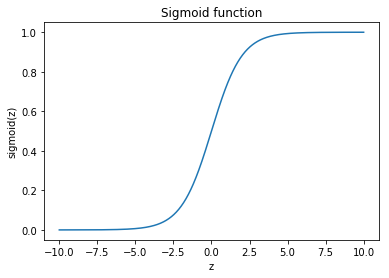

In [2]:
def sigma(z):
    return 1. / (1 + np.exp(-z))


xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx])
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function')

事件 $X$ 的概率记为 $P(X)$，则比值比 $OR(X)$ 由式 $\frac{P(X)}{1-P(X)}$ 决定，比值比是某一事件是否发生的概率之比。显然，概率和比值比包含同样的信息，不过 $P(X)$ 的范围是 0 到 1，而 $OR(X)$ 的范围是 0 到 $\infty$。如果计算 $OR(X)$ 的对数，那么显然有 $\log{OR(X)} \in \mathbb{R}$，这在 OLS 中有用到。

让我们看看逻辑回归是如何做出预测的：

$$p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$$

现在，假设已经通过某种方式得到了权重 $\textbf{w}$，即模型已经训练好了，逻辑回归预测的步骤如下：

步骤一 计算：

$$w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$$

等式 $\textbf{w}^\text{T}\textbf{x} = 0$ 定义了一个超空间将样本分为两类。

步骤二 计算对数比值比 $OR_{+}$

$$ \log(OR_{+}) = \textbf{w}^\text{T}\textbf{x}$$

步骤三 现在已经有了将一个样本分配到「+」分类的概率 $OR_{+}$，可以据此计算 $p_{+}$：

$$ p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} = \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$

上式的右边就是 sigmoid 函数。

所以，逻辑回归预测一个样本分配为「+」分类的概率（假定已知模型的特征和权重），这一预测过程是通过对权重向量和特征向量的线性组合进行 sigmoid 变换完成的，公式如下：

$$ p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

下面介绍模型是如何被训练的，我们将再次通过最大似然估计训练模型。

### 最大似然估计和逻辑回归

现在，看下从最大似然估计（MLE）出发如何进行逻辑回归优化，也就是最小化逻辑损失函数。前面已经见过了将样本分配为「+」分类的逻辑回归模型：

$$ p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^T\textbf{x}_\text{i})$$

「-」分类相应的表达式为：

$$ p_-(\textbf{x}_\text{i})  = P\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^T\textbf{x}_\text{i}) = \sigma(-\textbf{w}^T\textbf{x}_\text{i}) $$

这两个表达式可以组合成一个：

$$ P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^T\textbf{x}_\text{i})$$

表达式 $M(\textbf{x}_\text{i}) = y_i\textbf{w}^T\textbf{x}_\text{i}$ 称为目标 $\textbf{x}_\text{i}$ 的分类边缘。如果边缘非负，则模型正确选择了目标 $\textbf{x}_\text{i}$ 的分类；如果边缘为负，则目标  $\textbf{x}_\text{i}$ 被错误分类了。注意，边缘仅针对训练集中的目标（即标签 $y_i$ 已知的目标）而言。

为了准确地理解为何有这一结论，需要理解向线性分类器的几何解释。首先，看下线性代数的一个经典入门问题「找出向径 $\textbf{x}_A$ 与平面 $\textbf{w}^\text{T}\textbf{x} = 0$ 的距离」，即：

$$\rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$$

答案：

<img width='500px;' src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025468696'>

从答案中，可以看到，表达式 $\textbf{w}^\text{T}\textbf{x}_\text{i}$ 的绝对值越大，点 $\textbf{x}_\text{i}$ 离平面 $\textbf{w}^\text{T}\textbf{x} = 0$ 的距离就越远。

因此，表达式 $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ 是模型对目标 $\textbf{x}_\text{i}$ 分类的肯定程度：

- 如果边缘的绝对值较大，且为正值，那么分类的标签是正确的，且目标离分界超平面很远，也就是模型对这一分类很肯定。如下图点 $x_3$ 所示。
- 如果边缘的绝对值较大，且为负值，那么分类的标签是错误的，且目标离分界超平面很远，那么目标很可能是一个异常值（例如，它可能为训练集中一个错误标记的值）。如下图点 $x_1$ 所示。
- 如果边缘绝对值较小，那么目标距离分界超平面很近，其符号就决定了目标「是否被正确分类」。如下图点 $x_2$ 和 $x_4$ 所示。

<img width='500px;' src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025484745'>

现在，计算数据集的似然，即基于数据集 $\textbf{x}$ 观测到给定向量 $\textbf{y}$ 的概率。假设目标来自一个独立分布，然后可建立如下公式：

$$ P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

其中，$\ell$ 为数据集 $\textbf{X}$ 的长度（行数）。

对这个表达式取对数，简化计算：

$$ \log P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})   = $$

$$  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})$$

最大化似然等价于最小化以下表达式：

$$ \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}).$$

上式就是逻辑损失函数。用分类边缘 $M(\textbf{x}_\text{i})$ 改写逻辑损失函数，有 $L(M) = \log (1 + \exp^{-M})$

将这一函数的图像和 0-1 损失函数的图像绘制在一张图上。当错误分类发生时，0-1 损失函数只会以恒定的数值 1.0 惩罚模型，即 $L_{1/0}(M) = [M < 0]$。

<img width='500px;' src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025510180'>

上图体现了这样一个想法：如果不能够直接最小化分类问题的误差数量（至少无法通过梯度方法最小化，因为 0-1 损失函数在 0 的导数趋向无穷），那么可以转而最小化它的上界。对逻辑损失函数而言，以下公式是成立的：

$$ \mathcal{L_{1/0}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

其中 $\mathcal{L_{1/0}} (\textbf X, \textbf{y})$ 只是数据集$（\textbf X, \textbf{y}）$ 上权重 $\textbf{w}$ 的逻辑回归误差。因此，可以通过降低分类误差数 $\mathcal{L_{log}}$ 的上限，降低分数误差数本身。

### 逻辑回归的 $L_2$ 正则化

逻辑回归的 L2 正则化和岭回归的情况基本一样。代替 $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$，只用最小化下式：

$$ \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

在逻辑回归中，通常使用正则化系数的倒数 $C = \frac{1}{\lambda}$：

$$ \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

下面通过一个例子直观地理解正则化。

### 逻辑回归正则化示例

正则化是如何影响分类质量的呢？我们使用吴恩达机器学习课程中的「微芯片测试」数据集，运用基于多项式特征的逻辑回归方法，然后改变正则化参数 $C$。首先，看看正则化是如何影响分类器的分界，并查看欠拟合和过拟合的情况。接着，将通过交叉验证和网格搜索方法来选择接近最优值的正则化参数。

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

使用 Pandas 库的 `read_csv()` 方法加载数据。这个数据集内有 118 个微芯片（目标），其中有两项质量控制测试的结果（两个数值变量）和微芯片是否投产的信息。变量已经过归一化，即列中的值已经减去其均值。所以，微芯片的平均测试值为零。

In [4]:
# 读取数据集
data = pd.read_csv('../../data/microchip_tests.txt',
                   header=None, names=('test1', 'test2', 'released'))
# 查看数据集的一些信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


查看开始五行和最后五行的数据。

In [5]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


分离训练集和目标分类标签。

In [7]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

绘制数据，橙点对应有缺陷的芯片，蓝点对应正常芯片。

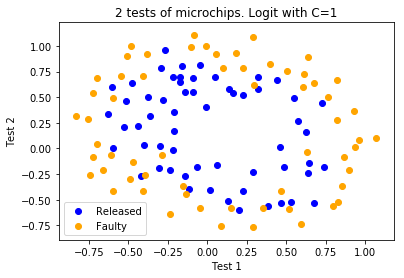

In [8]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=1')
plt.legend()

定义一个函数来显示分类器的分界线。

In [9]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # 在 [x_min, m_max]x[y_min, y_max] 的每一点都用它自己的颜色来对应
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

为两个变量 $x_1$ 和 $x_2$ 定义如下多形式特征：

$$ \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$


例如，$d=3$ 时的特征如下：

$$ 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

特征的数量会呈指数型增长，为 100 个变量创建 d 较大（例如 $d=10$）的多项式特征会导致计算成本变得很高。

使用 sklearn 库来实现逻辑回归。创建一个对象，为矩阵 $X$ 加上多项式特征（$d$ 不超过7）。

In [10]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [11]:
X_poly.shape

(118, 36)

训练逻辑回归模型，正则化系数 $C = 10^{-2}$。

Accuracy on training set: 0.627


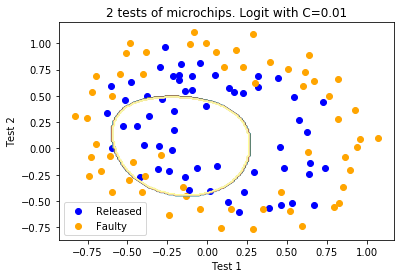

In [12]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

可以尝试减小正则化，即把 $C$ 增加到 1，现在的模型权重可以比之前有更大的值（绝对值更大），这使得分类器在训练集上的精确度提高到 0.831。

Accuracy on training set: 0.831


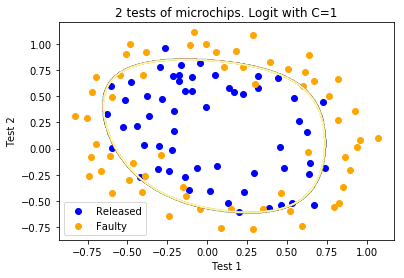

In [13]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

倘若继续增加 $C$ 到 10000 会如何？看下面结果，很明显正则化不够强导致了过拟合现象。

Accuracy on training set: 0.873


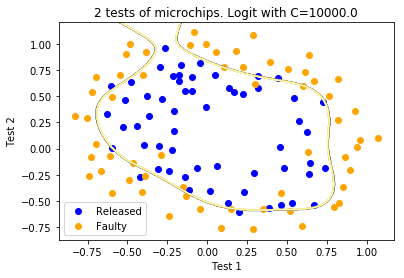

In [14]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend()

print("Accuracy on training set:",
      round(logit.score(X_poly, y), 3))

为了讨论上述的这些结果，改写一下逻辑回归的优化函数：

$$ J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

其中，


- $\mathcal{L}$ 是对整个数据集的总逻辑损失函数
- $C$ 是反向正则化系数

总结：

- 参数 $C$ 越大，模型中可恢复的数据之间的关系就越复杂（直观地说，$C$ 对应模型的「复杂度」：模型能力）。
- 如果正则化过强，即 $C$ 值很小，最小化逻辑损失函数问题的解（权重）可能过小或为零。这样的模型对误差的「惩罚」也不够（即在上面的函数 $J(X,y,w)$ 中，权重的平方和过高，导致误差 $L$ 较大）。在这一情形下，模型将会欠拟合。
- 如果正则化过弱，即 $C$ 值很大，最小化逻辑损失函数问题的解可能权重过大。在这一情形下， $L$ 对函数 $J(X,y,w)$ 贡献较大，导致过拟合。
- $C$ 是一个超参数，逻辑回归不会自动学习调整 $C$ 的值，我们可以通过交叉验证来人工选择较好的 $C$ 值。

### 正则化参数的调整

对上述例子中正则化参数 $C$ 进行调参。使用 `LogisticRegressionCV()` 方法进行网格搜索参数后再交叉验证，`LogisticRegressionCV()` 是专门为逻辑回归设计的。如果想对其他模型进行同样的操作，可以使用 `GridSearchCV()` 或 `RandomizedSearchCV()` 等超参数优化算法。

In [15]:
# 该单元格执行时间较长，请耐心等待
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
# 下方结尾的切片为了在线上环境搜索更快，线下练习时可以删除
c_values = np.logspace(-2, 3, 500)[50:450:50]

logit_searcher = LogisticRegressionCV(
    Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


LogisticRegressionCV(Cs=array([3.16958e-02, 1.00463e-01, 3.18424e-01, 1.00927e+00, 3.19897e+00,
       1.01394e+01, 3.21376e+01, 1.01863e+02]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [16]:
logit_searcher.C_

array([10.13939458])

查看超参数 $C$ 是如何影响模型的质量的。

Text(0, 0.5, 'Mean CV-accuracy')

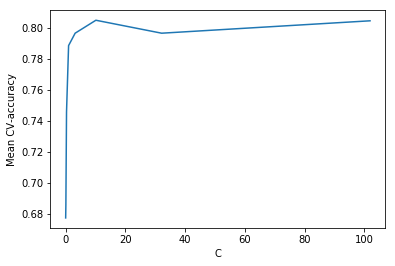

In [17]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')

最后，选择 $C$ 值「最佳」的区域，即在 Mean CV-accuracy 值达到较大值的前提下选择较小的 $C$。上图由于 $C$ 过大，无法辨认具体哪个较小的 $C$ 达到了较好的 Mean CV-accuracy 值，可以仅画出 $C$ 为 0 到 10 时的验证曲线。

(0, 10)

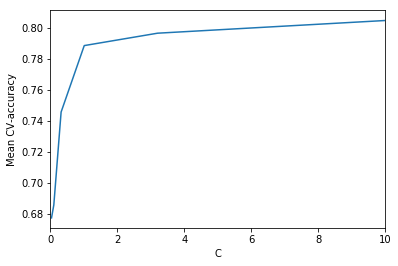

In [18]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')
plt.xlim((0, 10))

上图可见，$C=2$ 时就达到了较好的 Mean CV-accuracy 值。


### 逻辑回归的优缺点

通过分析 IMDB 影评的二元分类问题和 XOR 问题来简要说明逻辑回归的优缺点。

#### 分析 IMDB 二元分类问题

IMDB 数据集中的训练集包含标记好的影评，其中有 12500 条好评，12500 条差评。使用词袋模型构建输入矩阵 $X$ ，语料库包含所有用户影评，影评的特征将由整个语料库中每个词的出现情况来表示。下图展示了这一思路：

<img width='500px;' src="https://doc.shiyanlou.com/courses/uid214893-20190505-1557025533901">

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

载入 IMDB 数据集。首先，我们从实验楼服务器上下载并解压数据。

In [ ]:
# 文件较多，请耐心等待解压完成
!wget -nc "../../data/aclImdb_v1.tar.gz"
!tar -zxvf "aclImdb_v1.tar.gz"

In [21]:
PATH_TO_IMDB = "aclImdb/"
reviews_train = load_files(os.path.join(PATH_TO_IMDB, "train"),
                           categories=['pos', 'neg'])
text_train, y_train = reviews_train.data, reviews_train.target
reviews_test = load_files(os.path.join(PATH_TO_IMDB, "test"),
                          categories=['pos', 'neg'])
text_test, y_test = reviews_test.data, reviews_test.target

看看训练集和测试集中各有多少条数据。

In [22]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in training data: 25000
[12500 12500]
Number of documents in test data: 25000
[12500 12500]


下面是该数据集中的一些影评。

In [23]:
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

查看一下上面这条影评是差评还是好评。

In [24]:
y_train[1]

0

y_train=0 表示影评是差评，y_train=1 表示影评是好评，上面这条影片是差评。

#### 单词的简单计数

首先，使用 `CountVectorizer()` 创建包含所有单词的字典。

In [25]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

74849

查看创建后的「单词」样本，发现 IMDB 数据集已经自动进行了文本处理（自动化文本处理不在本实验讨论范围，如果感兴趣可以自行搜索）。

In [26]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot', 'pinciotti', 'pine', 'pineal', 'pineapple', 'pineapples', 'pines', 'pinet', 'pinetrees', 'pineyro', 'pinfall', 'pinfold', 'ping', 'pingo', 'pinhead', 'pinheads', 'pinho', 'pining', 'pinjar', 'pink', 'pinkerton', 'pinkett', 'pinkie', 'pinkins', 'pinkish', 'pinko', 'pinks', 'pinku', 'pinkus', 'pinky', 'pinnacle', 'pinnacles', 'pinned', 'pinning', 'pinnings', 'pinnochio', 'pinnocioesque', 'pino', 'pinocchio', 'pinochet', 'pinochets', 'pinoy', 'pinpoint', 'pinpoints', 'pins', 'pinsent']


接着，使用单词的索引编码训练集的句子，用稀疏矩阵保存。

In [27]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

让我们看看上述转换过程是如何进行的，首先查看需要转换的训练集句子。

In [28]:
text_train[19726]

b'This movie is terrible but it has some good effects.'

然后将每个单词转换成对应的单词索引。

In [29]:
X_train[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
       66562], dtype=int32)

In [30]:
X_train[19726].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
        66562], dtype=int32))


接下来，对测试集应用同样的操作。

In [31]:
X_test = cv.transform(text_test)

之后就可以使用逻辑回归来训练模型。

In [32]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=7, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

训练完成后，查看训练集和测试集上的准确率（Accuracy）。

In [33]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3),

(0.981, 0.864)

可视化模型的系数。

In [34]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack(
        [negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features),
            coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60, ha="right")

In [35]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
             color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
             color='red', label='test')
    plt.legend()

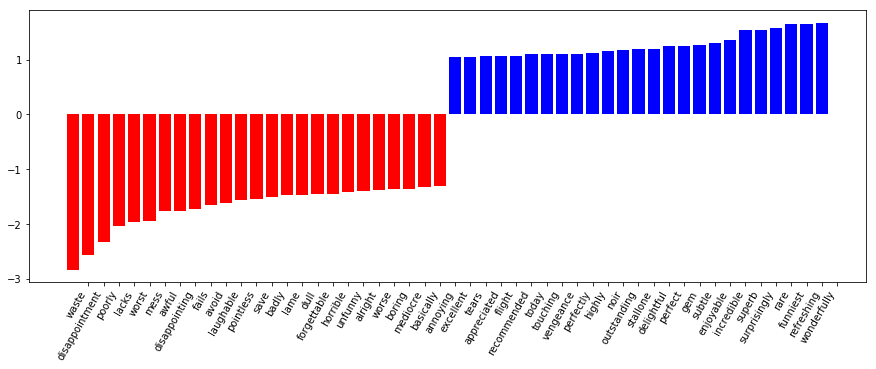

In [36]:
visualize_coefficients(logit, cv.get_feature_names())

对逻辑回归的正则化系数进行调参。`make_pipeline()` 确保的序列顺序，在训练数据上应用 `CountVectorizer()` 方法，然后训练逻辑回归模型。

In [37]:
from sklearn.pipeline import make_pipeline
# 该单元格执行时间较长，请耐心等待
text_pipe_logit = make_pipeline(CountVectorizer(),
                                LogisticRegression(solver='lbfgs',
                                                   n_jobs=1,
                                                   random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

0.864


In [38]:
from sklearn.model_selection import GridSearchCV
# 该单元格执行时间较长，请耐心等待
param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)[4:5]}
grid_logit = GridSearchCV(text_pipe_logit,
                          param_grid_logit,
                          return_train_score=True,
                          cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...  penalty='l2', random_state=7, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logisticregression__C': array([0.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

查看一下最佳 $C$，以及相应的交叉验证评分。

In [39]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8848)

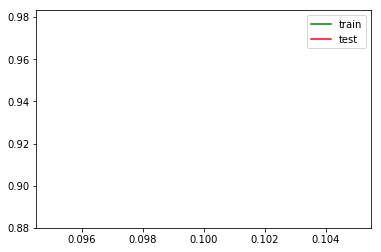

In [40]:
plot_grid_scores(grid_logit, 'logisticregression__C')

调优后的逻辑回归模型在验证集上的准确率。

In [41]:
grid_logit.score(text_test, y_test)

0.87812

现在换一种方法，使用随机森林来分类。

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200,
                                n_jobs=-1, random_state=17)

In [43]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [44]:
round(forest.score(X_test, y_test), 3)

0.855

上述结果可见，相较于随机森林，逻辑回归在 IMDB 数据集上表现更优。

#### XOR 问题


线性分类定义的是一个非常简单的分界平面：一个超平面，这导致线性模型在 XOR 问题上表现不佳。XOR 即异或，其真值表如下：

<img src='https://doc.shiyanlou.com/courses/uid214893-20190505-1557025558167'>

XOR 是一个简单的二元分类问题，其中两个分类呈对角交叉分布。下面创建数据集。

In [45]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

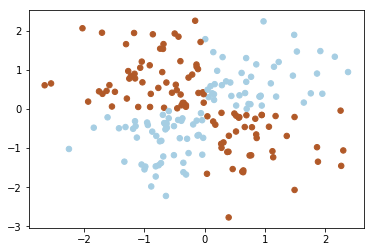

In [46]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)

显然，无法划出一条直线无误差地将两个分类分开。因此，逻辑回归在这一任务上的表现很差。

In [47]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                         np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12)

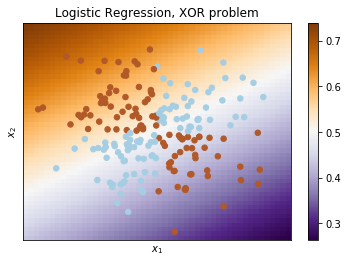

In [48]:
plot_boundary(LogisticRegression(solver='lbfgs'), X, y,
              "Logistic Regression, XOR problem")

然而，如果将输入变为多项式特征（这里 $d$ = 2），那么这一任务就可以得到较好的解决。

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [50]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression(solver='lbfgs'))])

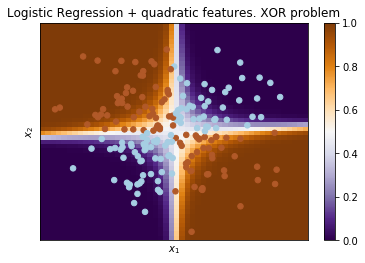

In [51]:
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")

通过将多项式特征作为输入，逻辑回归在 6 维特征空间（$1，x_1，x_2，x_1^2，x_1x_2，x_2^2$）中生成了一个超平面。当这个超平面投影到原特征空间（$x_1, x_2$）时，分界是非线性的。

在实际应用中，多项式特征确实有用，不过显式的创建它们会大大提升计算复杂度。使用核（kernel）函数的 SVM 方法相较逻辑回归要快很多，在 SVM 中，只计算高维空间中目标之间的距离（由核函数定义），而不用生成大量特征组合。


### 验证和学习曲线

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve, learning_curve
from matplotlib import pyplot as plt

上文对模型验证、交叉验证、正则化做了简单介绍，现在考虑一个更大的问题：如果模型的质量不佳，该怎么办？针对这个问题，有很多猜想：

- 应该让模型更复杂还是更简单？
- 应该加入更多特征吗？
- 是否只是需要更多数据用于训练？

这些猜想的答案并不明显，比如有时候一个更复杂的模型会导致表现退化，有时候增加新的特征带来的变化并不直观。事实上，做出正确决定，选择正确方法，从而改进模型的能力是衡量一个人对机器学习知识掌握程度的重要指标。

让我们回头看看电信运营商的客户离网数据集。

In [53]:
data = pd.read_csv(
    '../../data/telecom_churn.csv').drop('State', axis=1)
data['International plan'] = data['International plan'].map(
    {'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = data['Churn'].astype('int').values
X = data.drop('Churn', axis=1).values

使用随机梯度下降训练逻辑回归（在之后的实验中将会专门讨论梯度下降）。

In [54]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17, max_iter=5)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)),
                       ('sgd_logit', sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X, y,
                                       'sgd_logit__alpha', alphas, cv=5,
                                       scoring='roc_auc')

绘制 ROC-AUC 曲线，查看不同正则化参数下模型在训练集和测试集上的表现有何不同。

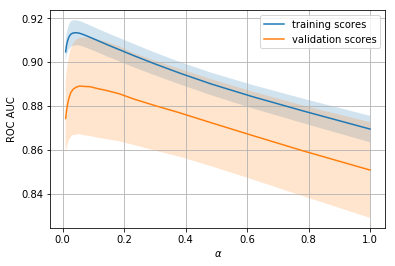

In [55]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)


plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)

上图的趋势表明：

- 简单模型的训练误差和验证误差很接近，且都比较大。这暗示模型欠拟合，参数数量不够多。
- 高度复杂模型的训练误差和验证误差相差很大，这暗示模型过拟合。当参数数量过多或者正则化不够严格时，算法可能被数据中的噪声「转移注意力」，没能把握数据的整体趋势。

上述结论可以推广到其他问题中。

### 数据对于模型的影响

一般而言，模型所用的数据越多越好。但新数据是否在任何情况下都有帮助呢？例如，为了评估特征 N ，而对数据集的数据进行加倍，这样做是否合理？

由于新数据可能难以取得，合理的做法是改变训练集的大小，然后看模型的质量与训练数据的数量之间的依赖关系，这就是「学习曲线」的概念。

这个想法很简单：将误差看作训练中所使用的样本数量的函数。模型的参数事先固定。

In [56]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)),
                           ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

把正则化系数设定为较大的数（alpha=10），查看线性模型的表现情况。

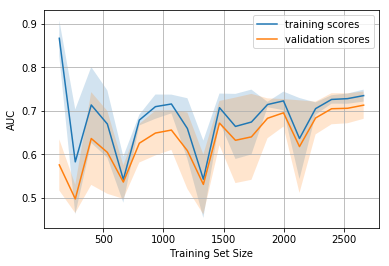

In [57]:
plot_learning_curve(degree=2, alpha=10)

上图表明：对于少量数据而言，训练集和交叉验证集之间的误差差别（方差）相当大，这暗示了过拟合。同样的模型，使用大量数据，误差「收敛」，暗示了欠拟合。加入更多数据，该训练集的误差不会增加，且该验证集上的误差也不会下降。所以，倘若误差「收敛」，如果不改变模型的复杂度，而是仅仅把数据集大小增大 10 倍，或许对最终的表现结果没有太大帮助。

如果将正则化系数 alpha 降低到 0.05，会怎么样？

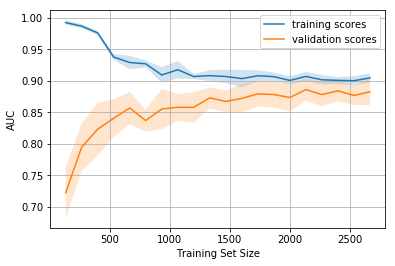

In [58]:
plot_learning_curve(degree=2, alpha=0.05)

上图表明，降低正则化系数 alpha 至 0.05，曲线将逐渐收敛，如果加入更多数据，可以进一步改善模型在验证集上的表现。

如果把 alpha 设为 $10^{-4}$，让模型更复杂，会出现什么情况？

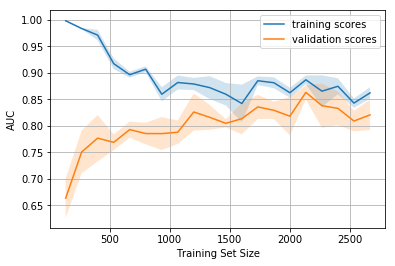

In [59]:
plot_learning_curve(degree=2, alpha=1e-4)

上图表明，与正则化系数 alpha=0.05 相比，在训练集和验证集上，AUC 都下降了，出现过拟合现象。

构建学习曲线和验证曲线可以帮助我们为新数据调整合适的模型复杂度。

关于验证曲线和学习曲线的结论：

- 训练集上的误差本身不能说明模型的质量。

- 交叉验证误差除了可以显示模型对数据的拟合程度外，还可以显示模型保留了多少对新数据的概括能力。
- 验证曲线是一条根据模型复杂度显示训练集和验证集结果的曲线：如果两条曲线彼此接近，且两者的误差都很大，这标志着欠拟合；如果两条曲线彼此距离很远，这标志着过拟合。
- 学习曲线是一个根据观测数量显示训练集和验证集结果的曲线：如果两条曲线收敛，那么增加新数据收益不大，有必要改变模型复杂度；如果两条曲线没有收敛，增加新数据可以改善结果。

### 实验总结

本次实验主要使用逻辑回归的方法构建线性回归和线性分类模型，正则化、验证曲线、学习曲线方法可以帮助我们更好更快的构建模型。

<i class="fa fa-link" aria-hidden="true"> 相关链接</i>

- [<i class="fa fa-external-link-square" aria-hidden="true"> 《深度学习》
</i>](http://www.deeplearningbook.org).
- [<i class="fa fa-external-link-square" aria-hidden="true"> scikit-learn 文档</i>](http://scikit-learn.org/stable/documentation.html) 
- [<i class="fa fa-external-link-square" aria-hidden="true"> scikit-learn 指南</i>](https://github.com/amueller/scipy-2017-sklearn)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 适合线性回归和逻辑回归的机器学习算法实现</i>](https://github.com/rushter/MLAlgorithms)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 了解实验楼《楼+ 机器学习和数据挖掘课程》</i>](https://www.shiyanlou.com/louplus/)